# Ejercicio

Utilizar el dataset de `fashion_mnist` e implementar una red neuronal MLP.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
from keras.callbacks import ModelCheckpoint
from keras.datasets import fashion_mnist
from keras.layers import Dense, Dropout, Activation
from keras.models import Sequential
# from keras.utils import np_utils
from tensorflow.python.keras.utils import np_utils

In [5]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print("X_train original shape", X_train.shape)
print("y_train original shape", y_train.shape)

4422102/4422102 [==============================] - 1s 0us/step
X_train original shape (60000, 28, 28)
y_train original shape (60000,)


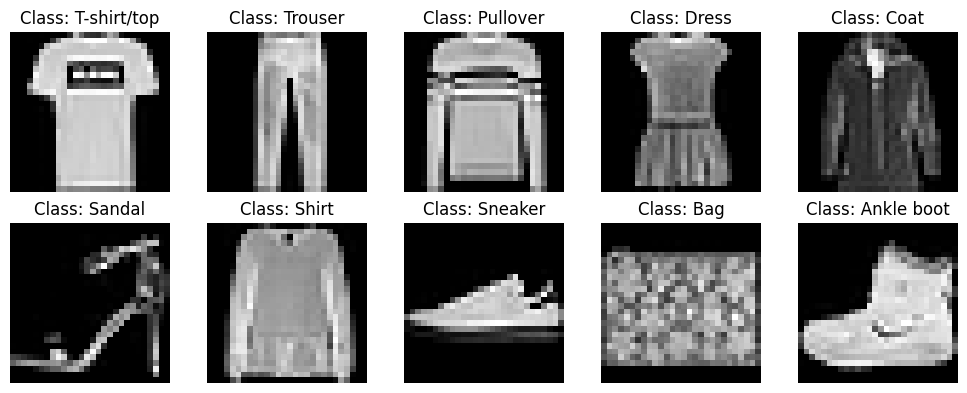

In [6]:
class_labels_dict = {0:"T-shirt/top",
                     1:"Trouser",
                     2:"Pullover",
                     3:"Dress",
                     4:"Coat",
                     5:"Sandal",
                     6:"Shirt",
                     7:"Sneaker",
                     8:"Bag",
                     9:"Ankle boot"}

fig = plt.figure(figsize=(10,4))

for i in range(10):
    plt.subplot(2,5,i+1)
    img = X_train[y_train == i][0]
    plt.imshow(img, cmap='gray', interpolation='none')
    plt.title("Class: {}".format(class_labels_dict[i]))
    plt.axis('off')

plt.tight_layout()

In [7]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [8]:
X_train /= 255
X_test /=  255

In [11]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices using one-hot encoding
num_classes =  10
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

In [12]:
model = Sequential() # Declare a Sequential model
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2)) # Dropout helps prevent the model from overfitting on the training data
model.add(Dense(512)) # Add a hidden layer of 512 units
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes)) # Add an output layer of 10 units, the number of classes
model.add(Activation('softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
filepath="./mlp-weights.{epoch:02d}-{val_loss:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

history = model.fit(X_train,
                    Y_train,
                    batch_size=128,
                    epochs=25,
                    verbose=1,
                    validation_data=(X_test,Y_test))



Epoch 1/25
469/469 [==============================] - 8s 5ms/step - loss: 0.5159 - accuracy: 0.8142 - val_loss: 0.4074 - val_accuracy: 0.8533
Epoch 2/25
469/469 [==============================] - 2s 4ms/step - loss: 0.3804 - accuracy: 0.8596 - val_loss: 0.3761 - val_accuracy: 0.8644
Epoch 3/25
469/469 [==============================] - 2s 4ms/step - loss: 0.3469 - accuracy: 0.8724 - val_loss: 0.3673 - val_accuracy: 0.8646
Epoch 4/25
469/469 [==============================] - 2s 5ms/step - loss: 0.3236 - accuracy: 0.8797 - val_loss: 0.3422 - val_accuracy: 0.8764
Epoch 5/25
469/469 [==============================] - 2s 4ms/step - loss: 0.3082 - accuracy: 0.8854 - val_loss: 0.3469 - val_accuracy: 0.8776
Epoch 6/25
469/469 [==============================] - 2s 5ms/step - loss: 0.2968 - accuracy: 0.8887 - val_loss: 0.3384 - val_accuracy: 0.8789
Epoch 7/25
469/469 [==============================] - 2s 4ms/step - loss: 0.2884 - accuracy: 0.8911 - val_loss: 0.3242 - val_accuracy: 0.8827
Epoch 

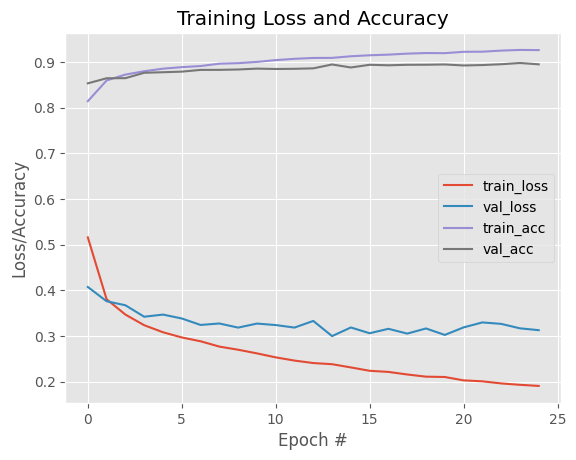

In [15]:
# Muestro gráfica de accuracy y losses
plt.style.use("ggplot")
plt.figure()
plt.plot(history.history["loss"], label="train_loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.plot(history.history["accuracy"], label="train_acc")
plt.plot(history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [16]:
best_score = max(history.history['accuracy'])
best_epoch = np.array(history.history['accuracy']).argmax()+1
print('Best test accuracy was %f at epoch %i' % (best_score, best_epoch))

Best test accuracy was 0.926450 at epoch 24


In [18]:
y_pred=model.predict(X_test)
y_pred_classes=np.argmax(y_pred,axis=1)

# Check which items we got right / wrong
correct_indices = np.nonzero(y_pred_classes == y_test)[0]
incorrect_indices = np.nonzero(y_pred_classes != y_test)[0]

313/313 [==============================] - 1s 2ms/step


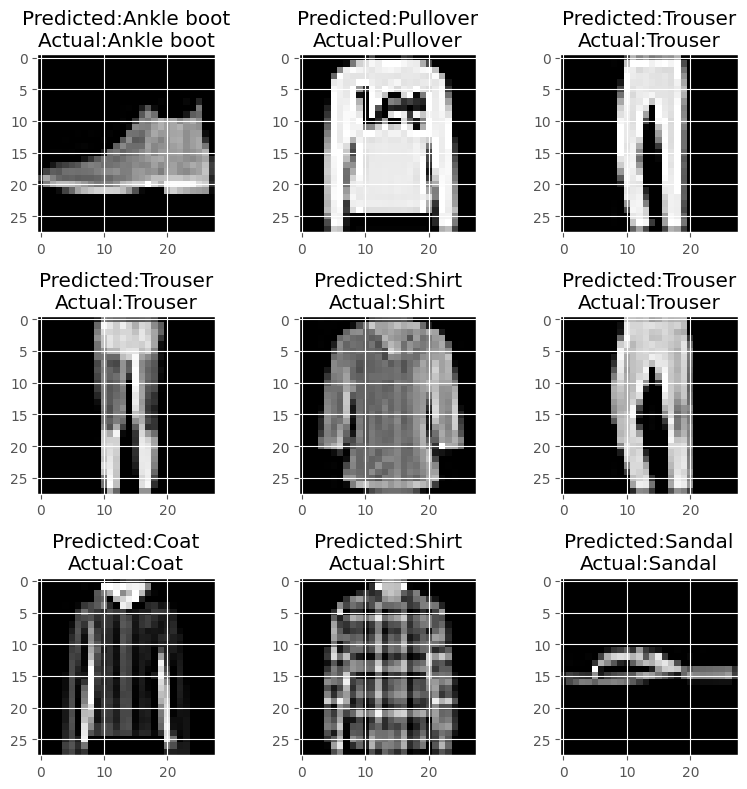

In [19]:
# Correctos

plt.figure(figsize=(8,8))

for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted:{}\nActual:{}".format(class_labels_dict[y_pred_classes[correct]],class_labels_dict[y_test[correct]]))

plt.tight_layout()

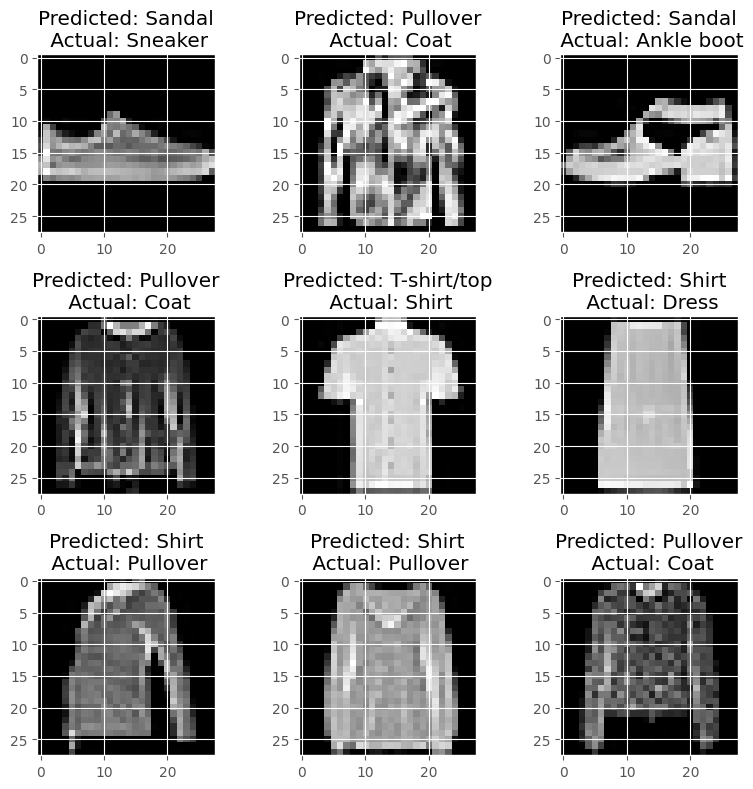

In [20]:
# Incorrectos

plt.figure(figsize=(8,8))
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted: {}\n Actual: {}".format(class_labels_dict[y_pred_classes[incorrect]], class_labels_dict[y_test[incorrect]]))

plt.tight_layout()